<a href="https://colab.research.google.com/github/zzzzzuuuuu/big-data-analytics/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의사결정트리(Decision Tree)
## 의사결정트리의 이해 (O/X, 알라딘게임이랑 비슷..)
- **어떤 규칙**을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결
- **규칙**은 'if-else'문으로 표현
- **트리**는 일종의 경로를 표현하는 것
- **트리 구조**의 마지막 노드에는 목적 변수가 들어감
```py
if age > 30:
  return True
else:
  return False
```

- 의사결정트리는 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델 중 효과와 실용성이 가장 굿
- 테이블형 데이터에 있어, 설명력과 성능의 측면에서 딥러닝 모델들과 대등하게 경쟁

### 의사결정트리 분류기
- 의사결정트리 노드 구성
  - 마지막 leaf 노드에는 클래스/예측치
  - 상위의 부모 노드들에는 if-else문의 조건이 해당
    - 분할 속성: 부모 노드에 들어가는 조건

- 분할 속성을 어떤 기준으로 정해야 가장 모호성을 줄일 것인지 파악
  - 정보이득(엔트로피)
  - 평준화된 정보이득
  - 지니 지수

- 그 기준에 따라 아래 3가지 알고리즘을 소개
  - ID3 (Iterative Dichotomiser 3)
  - C4.5
  - CART (Classification and Regression Tree)

- 학습 목표
  - 우선적으로, 피쳐들과 목적변수가 이산적인 범주형 변수인 상황의 알고리즘
    - 추후 피쳐 및 목적변수가 연속적인 변수인 상황으로 확장
    - 가지치기에 대해 소개

### ID3를 이해하기 위해 필요한 학습내용 (엔트로피)
- 엔트로피: 분포의 다양성정도(정보량)을 정량적으로 표현한 값
  - 낮은 엔트로피 = 경우의 수가 적음 = 낮은 불확실성
  - 높은 엔트로피 = 경우의 수가 높음 = 높은 불확실성
- 엔트로피를 측정하는 방법: 샤논(Shannon)의 공식을 활용 *p.12

- 엔트로피 예시 *p.13
  - 0에 가까울 수록 굿


## 의사결정트리의 알고리즘 - ID3
- 반복적으로 데이터를 나누는 알고리즘
  - 톱다운 방식으로 계속해서 데이터를 나누면서 현재 상태에서 최적화된 분할 속성을 선택
- 오직 범주형 데이터만 가능 (연속형x)

- 기본적인 ID3 알고리즘
```py
if 데이터 집합에 있는 모든 항목이 같은 레벨:
  분류 항목 표시 반환(ex.buy_yes)
else:
  Find Best Split_branch_attribute(ex, attribute-age)
  해당 속성을 기준으로 데이터셋 분할
  가지 노드 생성 (branch node)
    for each branch
      branch_node.add(Recursive branch split)
  return branch node
```

- 불순도 (애매모호성)
  - 의사결정트리 알고리즘은 데이터의 불순도(impurity)가 낮도록 속성 분류하는 것이 목표
- 정보 이득
  - 불순도를 엔트로피를 활용하여 측정
  - 어떤 속성이든 정보이득은 해당 속성으로 분류 시에 데이터의 불순도(엔트로피)가 얼만큼 많이 낮아졌는지 측정
  - 정보 이득이 가장 높은 속성을 분할 속성으로 결정
  - `전체 엔트로피 - 속성별 엔트로피 = 속성별 정보 이득`
    - 전체 엔트로피
      - Info(D) = (-p_i)*(log_2(p_i)의 합 (Yes or No)
    - 속성별 엔트로피 (분류 후 평균 엔트로피) *p.19
      - 속성A로 데이터를 분류했을 때 각 클러스터의 엔트로피를 계산한 후, 데이터의 개수만큼 가중치를 줌
    - 속성별 정보 이득 (분류시 감소시키는 엔트로피)
      - Gain(A) = Info(D) - Info_A(D)
  - 정보 이득이 크면 클 수록 속성A를 기준으로 데이터를 분류했을 때 감소시킬 수 있는 불순도가 크다는 뜻
  

- 정보 이득 계산 이후
  - 모든 속성들의 정보이득을 구한 후 가장 값이 큰 속성을 첫번째 분할 속성으로 결정
  - 각 그룹별로 분류 속성을 결정 (탑다운 방식)

### C4.5 알고리즘
- ID3에서 분류 속성을 결정하는 기준을 개선
- ID3에서 수식의 특성상, 분류 속성의 값이 다양할 수록 불순도가 낮아져 정보이득이 커지게 됨 (그룹 수 많을 수록)
- -> 속성의 값이 매우 다양해지면 불순도가 0에 가까워진다.

- => 값이 다양한 피쳐가 우선적으로 분류속성이 되는 문제 발생
  - 단순히 모든 데이터를 기억하는 것이 되므로 좋은 분류속성 X
  - 값의 다양성을 반영하여 정보이득을 낮추는 방안이 필요

- C4.5 알고리즘은 정보이득을 측정하는 방식을 평준화 시켜서 이러한 문제를 해결
  - 정보 이득에 속성의 그룹엔트로피를 나눔 (SplitI nfo)=>penalty
  - 다양한 속성 값을 가지면, SplitInfo가 매우 커져서, 낮은 정보이득값을 가짐
  - 같은 정보이득을 가질 때, 더 적은 그룹으로 분류되는 속성을 선택

- 연속형 데이터 가능, 결측치 처리 가능

### CART 알고리즘
- ID3에서 분류속성을 결정하는 기준을 지니지수로 개선
- ID3와 다르게 이진분할을 실시

- 지니 지수 *p.30
  - 경제학에서 소득의 불평등도를 측정할 때 사용하는 지표
  - 의사결정트리에서 각 속성의 불순도를 측정하는 방법으로 사용

- 속성들의 지니지수를 각각 계산한 후 지니지수가 가장 낮은 속성 선택

- 다만 CART는 이진 분할이므로, 각 지니지수 계산시 이진분할 기준을 선택해야 함
- 모든 경우에 대해 계산하고 최소값을 해당 지니지수로 결정 (가장 낮은)

---
- ID3: 단순한 분류 트리. 연속형 데이터와 결측치 처리가 불가하며, 정보 이득을 기준으로 분할.
- C4.5: ID3를 개선한 알고리즘으로, 연속형 데이터와 결측치를 처리할 수 있고 과적합 방지 효과가 우수.
- CART: 분류와 회귀 문제를 모두 처리할 수 있는 유연한 트리로, 지니 지수와 분산을 기준으로 분할하며 이진 분할을 사용.

## 의사결정트리의 확장
- 트리 가지치기
  - 과대적합 방지 방법
- 연속적인 값을 갖는 속성 분할 방법
- 회귀 트리
  - 타겟 변수가 연속적인 값을 갖는 경우

## 트리 가지치기
- 의사결정트리에서의 과대적합
  - 분할 후 데이터가 1개인 잎 노드(leaf node, 맨 마지막 노드)의 개수가 많다면, 과대적합
  - 잎 노드에 불순도가 높다면, 과소 적합(브랜치를 너무 확장하지 않음, 편향)
  - **잎 노드 개수, 트리의 깊이, 잎 노드에서의 학습 데이터 개수가 중요**
    - ㄴ GridSearchCV로 찾음

- 트리 가지치기 (tree pruning)
  - 의사결정트리의 마지막 노드의 개수를 지정하여 트리의 깊이를 조정하는 방법
  - 사전 가지치기 (사이킷런 O)
    - 학습 전에 잎 노드의 개수를 지정
  - 사후 가지치기 (사이킷런 X)
    - 학습 후에 잎 노드의 개수를 조정
  
## 연속적인 값을 갖는 속성 분할 방법
### 다양한 속성 분할 방법
- 모든 데이터를 기준점으로 하여 데이터 나누기
  - 너무 많은 기준점이 생겨 과대적합 문제가 발생하거나 분류의 정확도가 떨어짐
- 통계적 수치로 중위값이나 4분위수를 기준점으로 나누기
  - 50% or 25%씩 데이터를 나눠서 분류 기준을 변경
  - 과소적합 문제가 발생하여 분류의 성능을 떨어뜨릴 수 있음
- **목적 변수의 값이 변할 때를 기준점으로 삼아 분할**
  - 오름차순 정렬 후 target 변수가 바뀌는 지점
  - 해당 기준점은 경계값들의 평균
  - 가장 많이 사용하는 방법

- 여러 기준점 중에서 각 기준점대로 분할했을 때, 가장 큰 정보이득(표준화된 정보 이득, 지니지수)을 얻는 기준점을 찾아 해당 기준점을 분할 속성의 기준으로 결정 (이진분할)

## 회귀 트리
- 타겟 변수가 연속적인 값을 갖는 경우
- 정보 이득, 지니계수 -> 분산
  - 분할의 기준이 되었던 정보이득과 지니지수가 분산으로 바뀜
  - 속성으로 분할된 그룹별 분산의 평균 값을 비교
  - 분산이 낮은 속성을 분할 속성으로 선택
> 분산 ⬆ -> 엔트로피 ⬆ -> 불순도 ⬆

- 분할의 기준이 되었던 정보이득과 지니계수가 분산으로 바뀜
  - 목적 변수가 연속적임에 따라 분산으로 바뀜
- 최종 결과는 같은 그룹내의 학습 데이터들의 평균 값으로 예측
  - 해당 그룹의 분기 시 예측값은 학습 데이터들의 평균 값으로 예측


## 의사결정트리 구현 - #1
### DecisionTreeClassfier
- Option
  - criterion
    - 지니지수, 엔트로피 같은 속성의 분할 기준
  - splitter
    - 각 속성별 분할하는 기준점(best가 기본값)
  - max_depth
    - 트리 최대 깊이
  - max_leaf_nodes
    - 트리의 최대 잎 노드 개수
  - min_samples_split
    - 각 노드가 분할되기 위한 최소 데이터 개수
  - min_samples_leaf
    - 잎 노드의 최소 데이터 개수

## 1. DecisionTreeClassifier 클래스 사용하기

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris # 이산적인 값
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [33]:
# as_frame=False 넘파이 배열로 로드, iris dataset은 단순하기 때문에 가능
X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [5]:
# ? DicisionTreeClassifier

In [6]:
# criterion의 디폴트값은 gini
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             min_samples_split=3,
                             random_state=1234) # 트리 객체 생성
clf = clf.fit(X_train, y_train) # tree에서 fit은 각 노드들에서분할 기준이 결정됨

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # iris 다중 클래스 분류 문제

In [8]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### tree.plot_tree - #2
- 트리의 구조를 시각화
  - 트리의 분할 기준
  - 각 그룹의 데이터 개수 및 클래스별 개수
  - 지니지수와 같은 기준값

## 2. 트리 구조의 이해

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # tree import
%matplotlib inline

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [11]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\ngini = 0.667\nsamples = 100\nvalue = [33, 33, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

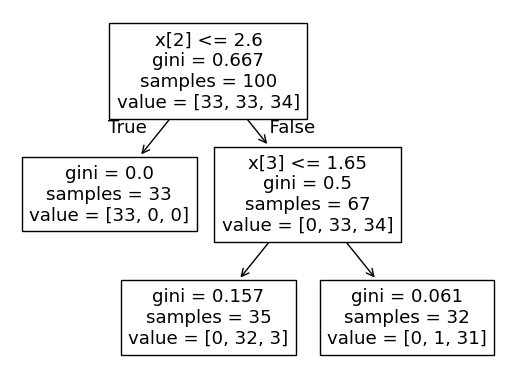

In [12]:
tree.plot_tree(clf)

## 3. 사전 가지치기 예시

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline # GridSearchCV, Pipeline으로 하이퍼파라미터 튜닝할것.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X.iloc[0, 0] = np.nan
X.iloc[1, 0] = np.nan
X.iloc[2, 2] = np.nan
X.iloc[3, 4] = np.nan
X.iloc[4, 3] = np.nan
X.iloc[5, 1] = np.nan
X.iloc[5, 2] = np.nan





X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [16]:
# max_depth가 None이면, 잎 노드의 클래스가 동일할 때까지 분할 (혹은 min_samples_leaf가 되거나)
max_depths = [None, 3, 6]
min_samples_splits = [2, 3, 4] # 얘네 두 개 하이퍼파라미터튜닝

In [19]:
pipeline = Pipeline(steps=[('imputer', SimpleImputer()),
                           ('scaler', StandardScaler()),
                           ('basemodel', DecisionTreeClassifier(criterion='gini', random_state=1234))])
param_grid={'basemodel__max_depth': max_depths, 'basemodel__min_samples_split': min_samples_splits}
kfold = KFold(n_splits=4, shuffle=True, random_state=1234)

In [21]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('basemodel',
                                        DecisionTreeClassifier(random_state=1234))]),
             param_grid={'basemodel__max_depth': [None, 3, 6],
                         'basemodel__min_samples_split': [2, 3, 4]})

In [22]:
print('최적 max_depth:',grid_search.best_params_['basemodel__max_depth'])
print('최적 min_saples_split:',grid_search.best_params_['basemodel__min_samples_split'])
print('최적 모델의 교차검증 스코어', grid_search.best_score_)

최적 max_depth: 3
최적 min_saples_split: 2
최적 모델의 교차검증 스코어 0.9319784870393228


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_test = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [24]:
grid_search

GridSearchCV(cv=KFold(n_splits=4, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('basemodel',
                                        DecisionTreeClassifier(random_state=1234))]),
             param_grid={'basemodel__max_depth': [None, 3, 6],
                         'basemodel__min_samples_split': [2, 3, 4]})

In [25]:
grid_search.best_estimator_ # pipeline을 의미, 여기서 Plot하고 싶은 부분은 DecisionTreeClassifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('basemodel',
                 DecisionTreeClassifier(max_depth=3, random_state=1234))])

In [26]:
grid_search.best_estimator_['basemodel'] # 딕셔너리 형식

DecisionTreeClassifier(max_depth=3, random_state=1234)

[Text(0.5, 0.875, 'x[7] <= 0.055\ngini = 0.465\nsamples = 426\nvalue = [157, 269]'),
 Text(0.25, 0.625, 'x[23] <= 0.137\ngini = 0.081\nsamples = 260\nvalue = [11, 249]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[29] <= -1.493\ngini = 0.039\nsamples = 251\nvalue = [5, 246]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.031\nsamples = 250\nvalue = [4, 246]'),
 Text(0.375, 0.375, 'x[29] <= -1.021\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'x[22] <= -0.136\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[21] <= 0.029\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.875, 0.375, 'x[21] 

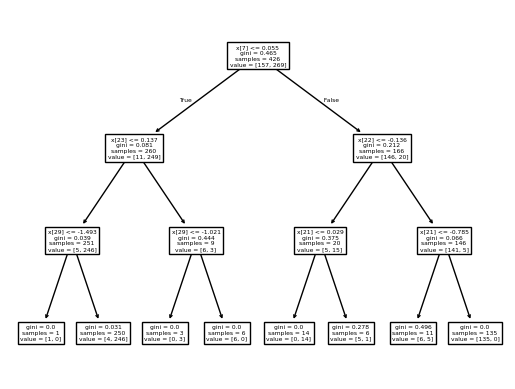

In [27]:
tree.plot_tree(grid_search.best_estimator_['basemodel']) # DecisionTreeClassfier 그림

## 4. 회귀 트리 구현하기 (DecisionTreeRegressor)
- 회귀 트리의 경우 활용

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [31]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
reg = DecisionTreeRegressor(random_state=1234, max_depth=4,
                            min_samples_split=4)
pipe = Pipeline(steps=[('scaler', scaler), ('reg', reg)]) # pipeline 객체 생성 엔트로피 or 지니지수 사용X
pipe = pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
print(f'학습 데이터셋 MAE:{(np.abs(y_pred - y_train)).mean(): .2f}')
print(f'학습 데이터셋 R2:{pipe.score(X_train,y_train): .2f}')

y_pred_test = pipe.predict(X_test)
print(f'학습 데이터셋 MAE:{(np.abs(y_pred_test - y_test)).mean(): .2f}')
print(f'학습 데이터셋 R2:{pipe.score(X_test, y_test): .2f}')

학습 데이터셋 MAE: 39.30
학습 데이터셋 R2: 0.59
학습 데이터셋 MAE: 45.67
학습 데이터셋 R2: 0.38


[Text(0.45535714285714285, 0.9, 'x[2] <= 0.142\nsquared_error = 6018.646\nsamples = 296\nvalue = 150.953'),
 Text(0.19642857142857142, 0.7, 'x[8] <= 0.134\nsquared_error = 3592.887\nsamples = 182\nvalue = 118.511'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'x[5] <= 2.173\nsquared_error = 2478.292\nsamples = 131\nvalue = 101.168'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 0.479\nsquared_error = 2204.612\nsamples = 129\nvalue = 98.992'),
 Text(0.03571428571428571, 0.1, 'squared_error = 2766.512\nsamples = 72\nvalue = 112.042'),
 Text(0.10714285714285714, 0.1, 'squared_error = 1008.039\nsamples = 57\nvalue = 82.509'),
 Text(0.14285714285714285, 0.3, 'squared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.2857142857142857, 0.5, 'x[3] <= -0.942\nsquared_error = 3698.761\nsamples = 51\nvalue = 163.059'),
 Text(0.21428571428571427, 0.3, 'x[7] <= 0.319\nsquared_error = 384.204\nsamples = 7\nvalue = 106.286'),
 Text(0.17857142857142858, 0.1, 'squared_err

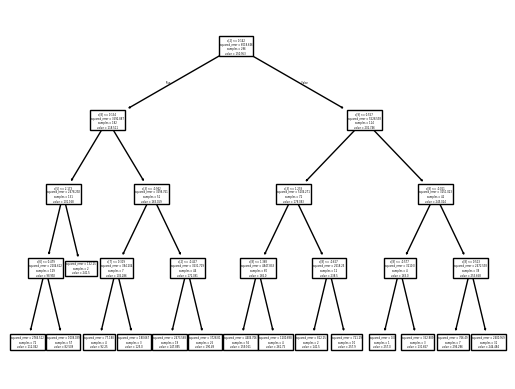

In [32]:
tree.plot_tree(pipe['reg'])